[Some of the content of this notebook is taken from: Jake VanderPlas' Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

# Data Transformations with Pandas-II


__Let's use what we learnt last week__


In [1]:
## import pandas
import pandas as pd
## use the url to read the file

url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv'

## read the file
flights = pd.read_csv(url)

In [2]:
## how many flights are there?
flights.shape


(336776, 19)

In [3]:
## what are the column names?
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [4]:
## what are the data types of columns?

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [5]:
flights.head().T

0                     1  \
year                            2013                  2013   
month                              1                     1   
day                                1                     1   
dep_time                       517.0                 533.0   
sched_dep_time                   515                   529   
dep_delay                        2.0                   4.0   
arr_time                       830.0                 850.0   
sched_arr_time                   819                   830   
arr_delay                       11.0                  20.0   
carrier                           UA                    UA   
flight                          1545                  1714   
tailnum                       N14228                N24211   
origin                           EWR                   LGA   
dest                             IAH                   IAH   
air_time                       227.0                 227.0   
distance                        1400                  1416   
hour                               5                     5   
minute                            15                    29   
time_hour       2013-01-01T10:00:00Z  2013-01-01T10:00:00Z   

                                   2                     3  \
year                            2013                  2013   
month                              1                     1   
day                                1                     1   
dep_time                       542.0                 544.0   
sched_dep_time                   540                   545   
dep_delay                        2.0                  -1.0   
arr_time                       923.0                1004.0   
sched_arr_time                   850                  1022   
arr_delay                       33.0                 -18.0   
carrier                           AA                    B6   
flight                          1141                   725   
tailnum                       N619AA                N804JB   
origin                           JFK                   JFK   
dest                             MIA                   BQN   
air_time                       160.0                 183.0   
distance                        1089                  1576   
hour                               5                     5   
minute                            40                    45   
time_hour       2013-01-01T10:00:00Z  2013-01-01T10:00:00Z   

                                   4  
year                            2013  
month                              1  
day                                1  
dep_time                       554.0  
sched_dep_time                   600  
dep_delay                       -6.0  
arr_time                       812.0  
sched_arr_time                   837  
arr_delay                      -25.0  
carrier                           DL  
flight                           461  
tailnum                       N668DN  
origin                           LGA  
dest                             ATL  
air_time                       116.0  
distance                         762  
hour                               6  
minute                             0  
time_hour       2013-01-01T11:00:00Z

## Vectorized Operations

Note sometimes we might want to apply some operations between columns or within a column. Because pandas built on `numpy` library such operations are easy with pandas and we will see that `numpy` functions work well with pandas objects.

In [6]:
import numpy as np

## fixing random state so that we got the same number each time 
## fixing the randomness
rng = np.random.RandomState(1)

random_numbers = rng.randint(0, 10, (5,3))
random_numbers

array([[5, 8, 9],
       [5, 0, 0],
       [1, 7, 6],
       [9, 2, 4],
       [5, 2, 4]])

In [7]:
import pandas as pd

## now generate some random numbers and use them to create a dataframe
toy_data = pd.DataFrame(random_numbers, columns= ['A', 'B', 'C'])
toy_data

A  B  C
0  5  8  9
1  5  0  0
2  1  7  6
3  9  2  4
4  5  2  4

In [8]:
## let's multiply column A with 4

toy_data.A * 4

0    20
1    20
2     4
3    36
4    20
Name: A, dtype: int64

In [9]:
## let's multiply every cell in the dataframe with 4

toy_data * 4

A   B   C
0  20  32  36
1  20   0   0
2   4  28  24
3  36   8  16
4  20   8  16

In [10]:
## we can add two columns

toy_data.A + toy_data.B

0    13
1     5
2     8
3    11
4     7
dtype: int64

In [11]:
## we can divide two columns

toy_data.A/toy_data.B


0    0.625000
1         inf
2    0.142857
3    4.500000
4    2.500000
dtype: float64

[On np.inf](https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas)

In [12]:
## we can apply numpy functions to dataframes and columns

np.log(toy_data.A)

0    1.609438
1    1.609438
2    0.000000
3    2.197225
4    1.609438
Name: A, dtype: float64

[More on the topic](https://jakevdp.github.io/PythonDataScienceHandbook/03.03-operations-in-pandas.html)

Let's go back to our `flights` data and use what we learnt:

- Consider the `arr_delay` and `dep_delay` columns. Note that any difference in these columns corresponds to the delays on air. For each flight find this. 

In [19]:
diff = flights.arr_delay-flights.dep_delay
# diff
# diff_less_than_zero = diff < 0
# diff_less_than_zero
flights[ diff_less_than_zero ]



year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
7       2013      1    1     557.0             600       -3.0     709.0   
8       2013      1    1     557.0             600       -3.0     838.0   
11      2013      1    1     558.0             600       -2.0     853.0   
...      ...    ...  ...       ...             ...        ...       ...   
336765  2013      9   30    2240.0            2245       -5.0    2334.0   
336766  2013      9   30    2240.0            2250      -10.0    2347.0   
336767  2013      9   30    2241.0            2246       -5.0    2345.0   
336768  2013      9   30    2307.0            2255       12.0    2359.0   
336769  2013      9   30    2349.0            2359      -10.0     325.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
3                 1022      -18.0      B6     725  N804JB    JFK  BQN   
4                  837      -25.0      DL     461  N668DN    LGA  ATL   
7                  723      -14.0      EV    5708  N829AS    LGA  IAD   
8                  846       -8.0      B6      79  N593JB    JFK  MCO   
11                 856       -3.0      B6      71  N657JB    JFK  TPA   
...                ...        ...     ...     ...     ...    ...  ...   
336765            2351      -17.0      B6    1816  N354JB    JFK  SYR   
336766               7      -20.0      B6    2002  N281JB    JFK  BUF   
336767               1      -16.0      B6     486  N346JB    JFK  ROC   
336768            2358        1.0      B6     718  N565JB    JFK  BOS   
336769             350      -25.0      B6     745  N516JB    JFK  PSE   

        air_time  distance  hour  minute             time_hour  
3          183.0      1576     5      45  2013-01-01T10:00:00Z  
4          116.0       762     6       0  2013-01-01T11:00:00Z  
7           53.0       229     6       0  2013-01-01T11:00:00Z  
8          140.0       944     6       0  2013-01-01T11:00:00Z  
11         158.0      1005     6       0  2013-01-01T11:00:00Z  
...          ...       ...   ...     ...                   ...  
336765      41.0       209    22      45  2013-10-01T02:00:00Z  
336766      52.0       301    22      50  2013-10-01T02:00:00Z  
336767      47.0       264    22      46  2013-10-01T02:00:00Z  
336768      33.0       187    22      55  2013-10-01T02:00:00Z  
336769     196.0      1617    23      59  2013-10-01T03:00:00Z  

[221565 rows x 19 columns]

In [21]:
# or this: (same as above)
# flights[flights.arr_delay - flights.dep_delay <0] 


In addition to basic mathematical operations we can easily use the string methods to `Series` objects in pandas. 

Let's first recall some of the string methods available in Python

In [22]:
flights.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      1416     5      29  2013-01-01T10:00:00Z  
2      1089     5      40  2013-01-01T10:00:00Z  
3      1576     5      45  2013-01-01T10:00:00Z  
4       762     6       0  2013-01-01T11:00:00Z

In [23]:
text = '  My name is John and by birthdate is 01/01/1960....'

In [26]:
text.strip()

'My name is John and by birthdate is 01/01/1960....'

In [24]:
## let's get rid of the white spaces at the beginning and the end of the text
text.strip(' ')

'My name is John and by birthdate is 01/01/1960....'

In [25]:
text.strip('.')

'  My name is John and by birthdate is 01/01/1960'

In [27]:
text.strip('. ')

'My name is John and by birthdate is 01/01/1960'

In [28]:
## we can make all the letters upper case or lower case

text.upper()

'  MY NAME IS JOHN AND BY BIRTHDATE IS 01/01/1960....'

In [29]:
text.lower()

'  my name is john and by birthdate is 01/01/1960....'

In [31]:
# we can also chain methods

text.strip('. ').lower()

'MY NAME IS JOHN AND BY BIRTHDATE IS 01/01/1960'

In [35]:
## we can check whether the text is starting with certain characters

text.strip().startswith('My')

True

In [36]:
## we can count the number of times a char is appearing in the text
text.count('M')

1

[For more on string methods](https://www.tutorialspoint.com/python-string-methods)

To be able to use these methods with `Series` objects that contains string values we need to use .str method.


Let's check how many of the destination airports startswith the letter 'D'


In [37]:
flights.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            5 non-null      int64  
 1   month           5 non-null      int64  
 2   day             5 non-null      int64  
 3   dep_time        5 non-null      float64
 4   sched_dep_time  5 non-null      int64  
 5   dep_delay       5 non-null      float64
 6   arr_time        5 non-null      float64
 7   sched_arr_time  5 non-null      int64  
 8   arr_delay       5 non-null      float64
 9   carrier         5 non-null      object 
 10  flight          5 non-null      int64  
 11  tailnum         5 non-null      object 
 12  origin          5 non-null      object 
 13  dest            5 non-null      object 
 14  air_time        5 non-null      float64
 15  distance        5 non-null      int64  
 16  hour            5 non-null      int64  
 17  minute          5 non-null      int64  

In [43]:
# lower case fligths.dest


In [44]:

flights_start_with_d_bool = flights.dest.str.startswith('D')
flights_start_with_d_bool

0         False
1         False
2         False
3         False
4         False
          ...  
336771     True
336772    False
336773    False
336774    False
336775    False
Name: dest, Length: 336776, dtype: bool

In [47]:
flights_start_with_d = flights[flights_start_with_d_bool]
flights_start_with_d.shape

(37187, 19)

In [48]:
flights_start_with_d.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
14  2013      1    1     559.0             600       -1.0     941.0   
21  2013      1    1     602.0             605       -3.0     821.0   
42  2013      1    1     635.0             635        0.0    1028.0   
49  2013      1    1     646.0             645        1.0     910.0   
66  2013      1    1     659.0             705       -6.0     907.0   

    sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
14             910       31.0      AA     707  N3DUAA    LGA  DFW     257.0   
21             805       16.0      MQ    4401  N730MQ    LGA  DTW     105.0   
42             940       48.0      AA     711  N3GKAA    LGA  DFW     248.0   
49             916       -6.0      UA     883  N569UA    LGA  DEN     243.0   
66             913       -6.0      DL     831  N998DL    LGA  DTW     105.0   

    distance  hour  minute             time_hour  
14      1389     6       0  2013-01-01T11:00:00Z  
21       502     6       5  2013-01-01T11:00:00Z  
42      1389     6      35  2013-01-01T11:00:00Z  
49      1620     6      45  2013-01-01T11:00:00Z  
66       502     7       5  2013-01-01T12:00:00Z

In [49]:
flights_start_with_d.dest.unique()

array(['DFW', 'DTW', 'DEN', 'DCA', 'DAY', 'DSM'], dtype=object)


- Strip all the white spaces in `origin` column if any
- Convert all the `origin` airports to lower letter case.

In [55]:
# let's do it together! 


## Group_By method: Basics

Sometimes we might need to group the rows with the values from certain columns

In [62]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(1,7)}, columns=['key', 'data'])
df
# print(df)

key  data
0   A     1
1   B     2
2   C     3
3   A     4
4   B     5
5   C     6

In [57]:
grouped_df = df.groupby('key')
grouped_df

In [60]:
for key, group in grouped_df:
    print('key', key)
    print(group, "\n")

key A
  key  data
0   A     1
3   A     4 

key B
  key  data
1   B     2
4   B     5 

key C
  key  data
2   C     3
5   C     6 



In [65]:
grouped_df.count()

data
key      
A       2
B       2
C       2

In [66]:
grouped_df.data

In [67]:
dir(grouped_df.data)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_examples_doc',
 '_agg_general',
 '_aggregate_multiple_funcs',
 '_aggregate_named',
 '_aggregate_with_numba',
 '_apply_allowlist',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_assure_grouper',
 '_bool_agg',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_dir_additions',
 '_dir_deletions',
 '_fill',
 '_get_cython_func',
 '_get_cythonized_result',
 '_get_in

In [68]:
grouped_df.data.min()

key
A    1
B    2
C    3
Name: data, dtype: int64

In [69]:
grouped_df.data.mean()

key
A    2.5
B    3.5
C    4.5
Name: data, dtype: float64

__What is happening under the hood__

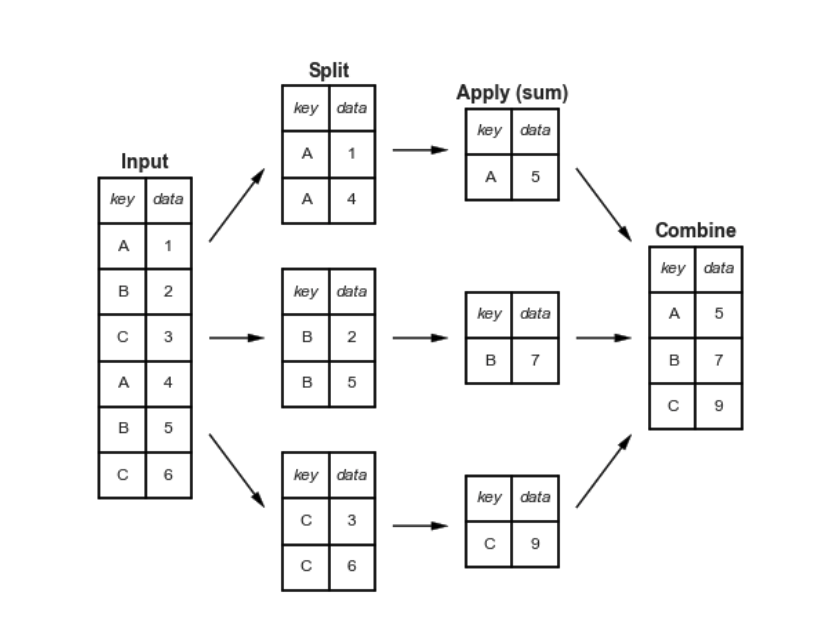

[Figure Source](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#Split,-apply,-combine)

For example let's take a look at whether there is any difference in the dep_delay times with respect to origin airport

In [70]:
flights.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      1416     5      29  2013-01-01T10:00:00Z  
2      1089     5      40  2013-01-01T10:00:00Z  
3      1576     5      45  2013-01-01T10:00:00Z  
4       762     6       0  2013-01-01T11:00:00Z

In [74]:
flights.groupby('origin').dep_delay.mean()

origin
EWR    15.107954
JFK    12.112159
LGA    10.346876
Name: dep_delay, dtype: float64

We can work on specific groups!

In [75]:
grouped = flights.groupby('origin')

In [81]:
# grouped.groups

In [79]:
grouped.get_group('EWR').head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   2013      1    1     517.0             515        2.0     830.0   
5   2013      1    1     554.0             558       -4.0     740.0   
6   2013      1    1     555.0             600       -5.0     913.0   
13  2013      1    1     558.0             600       -2.0     923.0   
16  2013      1    1     559.0             600       -1.0     854.0   

    sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0              819       11.0      UA    1545  N14228    EWR  IAH     227.0   
5              728       12.0      UA    1696  N39463    EWR  ORD     150.0   
6              854       19.0      B6     507  N516JB    EWR  FLL     158.0   
13             937      -14.0      UA    1124  N53441    EWR  SFO     361.0   
16             902       -8.0      UA    1187  N76515    EWR  LAS     337.0   

    distance  hour  minute             time_hour  
0       1400     5      15  2013-01-01T10:00:00Z  
5        719     5      58  2013-01-01T10:00:00Z  
6       1065     6       0  2013-01-01T11:00:00Z  
13      2565     6       0  2013-01-01T11:00:00Z  
16      2227     6       0  2013-01-01T11:00:00Z


- Now can you find the average `dep_delay` times by destinations

- Keep the result in variable called `delays_destination`

In [82]:
## let's do it together

delays_destination = flights.groupby('dest').dep_delay.mean()
delays_destination

dest
ABQ    13.740157
ACK     6.456604
ALB    23.620525
ANC    12.875000
ATL    12.509824
         ...    
TPA    12.135007
TUL    34.906355
TVC    22.083333
TYS    28.493955
XNA     6.464886
Name: dep_delay, Length: 105, dtype: float64

Let's visualize this

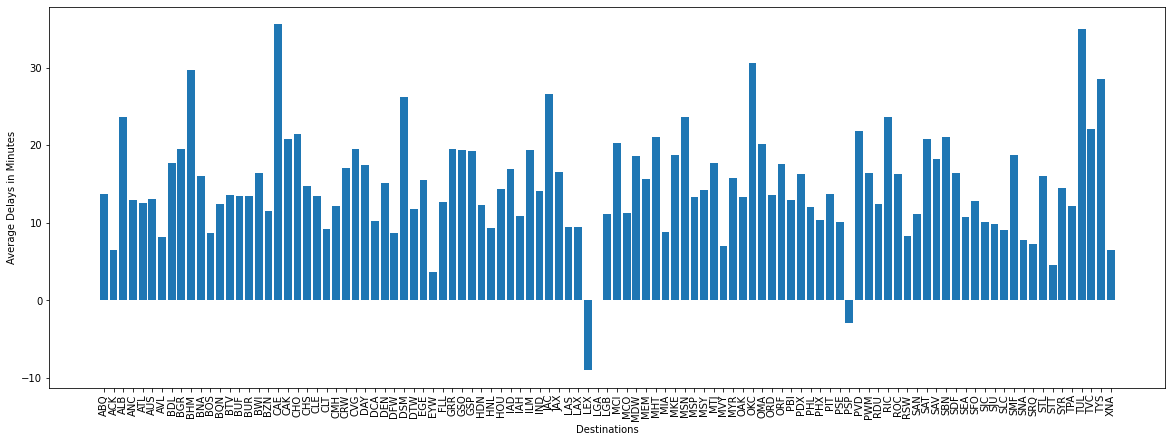

In [83]:
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize = (20, 7))

# Histogram
plt.bar(delays_destination.index, delays_destination.values)

# x-label
plt.xlabel('Destinations')

# y-label
plt.ylabel('Average Delays in Minutes')

plt.xticks(rotation = 90)

plt.show()

Let's take a look at the destinations with avg delay is more than 25

In [84]:
delays_destination[delays_destination >25]


dest
BHM    29.694853
CAE    35.570093
DSM    26.232955
JAC    26.545455
OKC    30.568807
TUL    34.906355
TYS    28.493955
Name: dep_delay, dtype: float64

Do you see any pattern?

__BHM__: [Birmingham-AL](https://goo.gl/maps/9UHiEJxrjQCZkbim7)

__CAE__: [Columbia-SC](https://goo.gl/maps/HzF1ZSQyWz4LoxTi6)

__DSM__: [Des Moines - IO](https://goo.gl/maps/3EgkwDpfYKo6Yngv5)

__JAC__: [Jackson - WY](https://goo.gl/maps/CESs8scrCM5GWAda8)

__OKC__: [Oklahoma City - OK](https://goo.gl/maps/DfUEo7r9tV3FEzKq7)

__TUL__: [Tulsa - OK](https://goo.gl/maps/xuArw3CEjHh4zh5R6)

__TYS__: [Knoxville - TN](https://goo.gl/maps/5cyYPi2xZhdiADkDA)


## Aggregation

- I would like to hypothesize that these airports have less air-traffic then some other airports. To be able to see this, I need to group my data with `destinations` and then take the `mean` of `dep_delay` and `count` of `dest`.

- To achieve our goal quickly we can use `aggregate` method.

In [92]:
## First create a dictionary with column to method
agg_dict = {
    'dest': 'count',
    'dep_delay': 'mean'
}


In [91]:
## use the dictionary we created above in .aggregate method
aggregated_df = flights.groupby('dest').aggregate(agg_dict)
aggregated_df

dest  dep_delay
dest                  
ABQ     254      142.0
ACK     265      219.0
ALB     439      323.0
ANC       8       75.0
ATL   17215      898.0
...     ...        ...
TPA    7466      960.0
TUL     315      251.0
TVC     101      230.0
TYS     631      291.0
XNA    1036      316.0

[105 rows x 2 columns]

__Let's check our hypothesis:__

In [93]:
## check the values with destinations with more than 25mins average delay
aggregated_df[aggregated_df.dep_delay >25]

dest  dep_delay
dest                  
ABQ     254      142.0
ACK     265      219.0
ALB     439      323.0
ANC       8       75.0
ATL   17215      898.0
...     ...        ...
TPA    7466      960.0
TUL     315      251.0
TVC     101      230.0
TYS     631      291.0
XNA    1036      316.0

[102 rows x 2 columns]

Note that the count is 631 for the `TYS` see how many other destinations have less than this value as their flights count.


In [96]:
aggregated_df[aggregated_df.dest <631].shape

(36, 2)

Only 36 of the destinations got less flights from NYC airports than the destinations of those fligths with more than 25 mins average delay_time. In this data we have 105 different destinations total.

### Aggregation and naming columns of the resulting table

In [99]:
# type(aggregated_df)
aggregated_df

dest  dep_delay
dest                  
ABQ     254      142.0
ACK     265      219.0
ALB     439      323.0
ANC       8       75.0
ATL   17215      898.0
...     ...        ...
TPA    7466      960.0
TUL     315      251.0
TVC     101      230.0
TYS     631      291.0
XNA    1036      316.0

[105 rows x 2 columns]

In [98]:
## Note that the following code is not working

aggregated_df.sort_values(by = 'dest')

ValueError: 'dest' is both an index level and a column label, which is ambiguous.

Sometimes we might want to give names to columns after the aggregation. Here is how you can achive this.

In [101]:
## Renaming Aggregated Column Names

grouped_by_dest = flights.groupby('dest').agg(
    flight_counts = ('dest', 'count') , 
    delay_mean= ('dep_delay', 'mean') ,
    delay_max=('dep_delay', 'max'),
    distance_mean = ('distance', 'mean')
    )
grouped_by_dest

flight_counts  delay_mean  delay_max  distance_mean
dest                                                     
ABQ             254   13.740157      142.0    1826.000000
ACK             265    6.456604      219.0     199.000000
ALB             439   23.620525      323.0     143.000000
ANC               8   12.875000       75.0    3370.000000
ATL           17215   12.509824      898.0     757.108220
...             ...         ...        ...            ...
TPA            7466   12.135007      960.0    1003.935575
TUL             315   34.906355      251.0    1215.000000
TVC             101   22.083333      230.0     652.386139
TYS             631   28.493955      291.0     638.809826
XNA            1036    6.464886      316.0    1142.505792

[105 rows x 4 columns]

### User defined functions

Finally we can use user-defined functions for aggregation

In [113]:
# define my_avg_funct
def my_avg_func(x):
#     print('------------')
#     print(type(x))
    return x.mean()

def sk(x):
#     print('---')
#     print(x)
#     print(','.join(x.unique()))
    return ','.join(x.unique())

# show that we can use my_avg_func instead of 'mean'
grouped_by_dest = flights.groupby('dest').agg(
    flight_counts = ('dest', 'count') , 
    delay_mean= ('dep_delay', 'mean') ,
    distance_mean = ('distance', my_avg_func),
    custom = ('origin', sk)
    )
grouped_by_dest

## we can also use built-in functions from other libraries
## especially from numpy

flight_counts  delay_mean  distance_mean       custom
dest                                                       
ABQ             254   13.740157    1826.000000          JFK
ACK             265    6.456604     199.000000          JFK
ALB             439   23.620525     143.000000          EWR
ANC               8   12.875000    3370.000000          EWR
ATL           17215   12.509824     757.108220  LGA,JFK,EWR
...             ...         ...            ...          ...
TPA            7466   12.135007    1003.935575  JFK,EWR,LGA
TUL             315   34.906355    1215.000000          EWR
TVC             101   22.083333     652.386139      LGA,EWR
TYS             631   28.493955     638.809826      EWR,LGA
XNA            1036    6.464886    1142.505792      LGA,EWR

[105 rows x 4 columns]

In [114]:
## we can also use the .agg method in this way

flights.groupby('dest').dep_delay.agg(['mean', 'count', my_avg_func])


mean  count  my_avg_func
dest                               
ABQ   13.740157    254    13.740157
ACK    6.456604    265     6.456604
ALB   23.620525    419    23.620525
ANC   12.875000      8    12.875000
ATL   12.509824  16898    12.509824
...         ...    ...          ...
TPA   12.135007   7407    12.135007
TUL   34.906355    299    34.906355
TVC   22.083333     96    22.083333
TYS   28.493955    579    28.493955
XNA    6.464886   1011     6.464886

[105 rows x 3 columns]

## Grouping by multiple variables

Sometimes we will group rows using more than one variables.

Let's group all the flight by using both origin and destination of the flights store the result in a variable named `multiple_grouped`


In [118]:
# if you want to goto the next line use \

multiple_grouped = flights \
    .groupby(['origin', 'dest']) \
    .agg({'dest':'count', 'dep_delay': 'mean'})

multiple_grouped

dest  dep_delay
origin dest                 
EWR    ALB    439  23.620525
       ANC      8  12.875000
       ATL   5022  15.501738
       AUS    968  11.508863
       AVL    265   8.616601
...           ...        ...
LGA    SYR    293  19.110701
       TPA   2145  11.287324
       TVC     77  23.410959
       TYS    308  12.705660
       XNA    745   5.933793

[224 rows x 2 columns]

Now we can access a group by usign its multiple index:

In [120]:
## get the group with 'EWR'
multiple_grouped.loc['EWR']

dest  dep_delay
dest                 
ALB    439  23.620525
ANC      8  12.875000
ATL   5022  15.501738
AUS    968  11.508863
AVL    265   8.616601
...    ...        ...
TPA   2334  13.068505
TUL    315  34.906355
TVC     24  17.869565
TYS    323  41.818471
XNA    291   7.811189

[86 rows x 2 columns]

In [121]:
## get the group with ('EWR', 'ALB')
multiple_grouped.loc[('EWR', 'ALB')]


dest         439.000000
dep_delay     23.620525
Name: (EWR, ALB), dtype: float64

In [122]:
multiple_grouped.loc[('JFK', 'BOS')]

dest         5898.000000
dep_delay      11.694953
Name: (JFK, BOS), dtype: float64

## Filtering

A filtering operation allows you to drop data based on the group properties. 

Define a function that checks whether for a given group the mean delay time is more than 25 mins

In [123]:
def my_delay_func(group):
    return group.dep_delay.mean() > 25

## use my_delay_func to .filter the original dataframe
filtered_by_delay = flights.groupby('dest').filter(my_delay_func)
filtered_by_delay

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
152     2013      1    1     848.0             851       -3.0    1155.0   
733     2013      1    1    1952.0            1930       22.0    2358.0   
742     2013      1    1    2000.0            1930       30.0    2255.0   
754     2013      1    1    2016.0            1930       46.0       NaN   
803     2013      1    1    2119.0            1930      109.0    2358.0   
...      ...    ...  ...       ...             ...        ...       ...   
336659  2013      9   30    1939.0            1950      -11.0    2112.0   
336677  2013      9   30    2000.0            2007       -7.0    2142.0   
336707  2013      9   30    2031.0            2040       -9.0    2228.0   
336731  2013      9   30    2059.0            2003       56.0    2311.0   
336734  2013      9   30    2104.0            2019       45.0    2304.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
152               1136       19.0      UA    1741  N27724    EWR  JAC   
733               2207        NaN      EV    4333  N11194    EWR  TUL   
742               2140       75.0      EV    4361  N12567    EWR  TYS   
754               2220        NaN      EV    4204  N14168    EWR  OKC   
803               2136      142.0      EV    4543  N13123    EWR  DSM   
...                ...        ...     ...     ...     ...    ...  ...   
336659            2141      -29.0      EV    5038  N713EV    LGA  BHM   
336677            2202      -20.0      EV    4543  N11194    EWR  DSM   
336707            2300      -32.0      9E    4033  N8924B    LGA  TYS   
336731            2237       34.0      EV    4204  N11127    EWR  OKC   
336734            2240       24.0      EV    4333  N11109    EWR  TUL   

        air_time  distance  hour  minute             time_hour  
152        275.0      1874     8      51  2013-01-01T13:00:00Z  
733          NaN      1215    19      30  2013-01-02T00:00:00Z  
742        138.0       631    19      30  2013-01-02T00:00:00Z  
754          NaN      1325    19      30  2013-01-02T00:00:00Z  
803        200.0      1017    19      30  2013-01-02T00:00:00Z  
...          ...       ...   ...     ...                   ...  
336659     112.0       866    19      50  2013-09-30T23:00:00Z  
336677     138.0      1017    20       7  2013-10-01T00:00:00Z  
336707      86.0       647    20      40  2013-10-01T00:00:00Z  
336731     166.0      1325    20       3  2013-10-01T00:00:00Z  
336734     154.0      1215    20      19  2013-10-01T00:00:00Z  

[2299 rows x 19 columns]

Note that this is not equal to getting all flights whose delay time is more than 25 mins.

In [ ]:
# return all the flights with more than 25 mins delay
flights[flights.dep_delay > 25]


In [124]:
## Show that in `filtered_by_delay` there are some observations that have delay time less than 25 mins.

filtered_by_delay.dep_delay.value_counts()

-5.0      129
-3.0      109
-7.0      106
-4.0      100
-6.0       92
         ... 
 173.0      1
 157.0      1
 175.0      1
 211.0      1
 266.0      1
Name: dep_delay, Length: 231, dtype: int64

__If time allows...__

You can check the code below and see how filter works under the hood:

In [125]:
## when we use groupby method pandas returns a groupby object
grouped = flights.groupby('dest')

## this groupby object has get_group method that allow us to access individual groups

print(grouped.get_group('CAE'))
## note that result is a dataframe

print(type(grouped.get_group('CAE')))

## now we can check the average dep_delay time for this group is bigger than 25 or not

grouped.get_group('CAE').dep_delay.mean() > 25

## Note that the average dep_delay is more than 25
## therefore observations that belong to 'CAE' group will be returned after we filter the dataframe

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
2511    2013      1    3    1843.0            1828       15.0    2102.0   
5000    2013      1    6    1839.0            1836        3.0    2118.0   
8654    2013      1   10    1827.0            1828       -1.0    2031.0   
11163   2013      1   13    1958.0            1836       82.0    2231.0   
14837   2013      1   17    2004.0            1828       96.0    2227.0   
...      ...    ...  ...       ...             ...        ...       ...   
322546  2013      9   15    1807.0            1810       -3.0    2044.0   
326428  2013      9   19    1809.0            1757       12.0    1955.0   
329047  2013      9   22    1805.0            1810       -5.0    2021.0   
333052  2013      9   26    1911.0            1745       86.0    2124.0   
335621  2013      9   29    1858.0            1900       -2.0    2059.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
2511              2026    

True

In [ ]:
# grouped.groups

In [126]:
## in fact we know from our previous work that the destinations with more than 25 mins 
## delay are ['JAC', 'TUL', 'DSM', 'OKC', 'TYS', 'BHM', 'CAE' ]
## therefore the filtering above is equivalent to the code below but more convenient

flights[flights.dest.isin(['JAC', 'TUL', 'DSM', 'OKC', 'TYS', 'BHM', 'CAE' ])]

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
152     2013      1    1     848.0             851       -3.0    1155.0   
733     2013      1    1    1952.0            1930       22.0    2358.0   
742     2013      1    1    2000.0            1930       30.0    2255.0   
754     2013      1    1    2016.0            1930       46.0       NaN   
803     2013      1    1    2119.0            1930      109.0    2358.0   
...      ...    ...  ...       ...             ...        ...       ...   
336659  2013      9   30    1939.0            1950      -11.0    2112.0   
336677  2013      9   30    2000.0            2007       -7.0    2142.0   
336707  2013      9   30    2031.0            2040       -9.0    2228.0   
336731  2013      9   30    2059.0            2003       56.0    2311.0   
336734  2013      9   30    2104.0            2019       45.0    2304.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
152               1136       19.0      UA    1741  N27724    EWR  JAC   
733               2207        NaN      EV    4333  N11194    EWR  TUL   
742               2140       75.0      EV    4361  N12567    EWR  TYS   
754               2220        NaN      EV    4204  N14168    EWR  OKC   
803               2136      142.0      EV    4543  N13123    EWR  DSM   
...                ...        ...     ...     ...     ...    ...  ...   
336659            2141      -29.0      EV    5038  N713EV    LGA  BHM   
336677            2202      -20.0      EV    4543  N11194    EWR  DSM   
336707            2300      -32.0      9E    4033  N8924B    LGA  TYS   
336731            2237       34.0      EV    4204  N11127    EWR  OKC   
336734            2240       24.0      EV    4333  N11109    EWR  TUL   

        air_time  distance  hour  minute             time_hour  
152        275.0      1874     8      51  2013-01-01T13:00:00Z  
733          NaN      1215    19      30  2013-01-02T00:00:00Z  
742        138.0       631    19      30  2013-01-02T00:00:00Z  
754          NaN      1325    19      30  2013-01-02T00:00:00Z  
803        200.0      1017    19      30  2013-01-02T00:00:00Z  
...          ...       ...   ...     ...                   ...  
336659     112.0       866    19      50  2013-09-30T23:00:00Z  
336677     138.0      1017    20       7  2013-10-01T00:00:00Z  
336707      86.0       647    20      40  2013-10-01T00:00:00Z  
336731     166.0      1325    20       3  2013-10-01T00:00:00Z  
336734     154.0      1215    20      19  2013-10-01T00:00:00Z  

[2299 rows x 19 columns]

## Transform Method

In [127]:
## lets define each flights speed per minute (maybe per hour?)
## keep the column in the dataframe as speed_per_min

flights['speed_per_min'] = flights.distance / flights.air_time

In [129]:
flights.tail(2)

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
336774            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
336775            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

        air_time  distance  hour  minute             time_hour  speed_per_min  
336774       NaN       419    11      59  2013-09-30T15:00:00Z            NaN  
336775       NaN       431     8      40  2013-09-30T12:00:00Z            NaN

Now let's compare each observation with the mean of their destination group.

In [130]:
## create a func that checks the group mean and each observations difference from that mean
def speed_func(group):
    return group - group.mean()

## Now we can use this function to transform our data

# flights.groupby('dest')['speed_per_min'].transform(speed_func)

flights['speed_dif_from_group'] = flights.groupby('dest')['speed_per_min'].transform(speed_func)

flights.head(2)

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   

   sched_arr_time  arr_delay carrier  ...  tailnum origin dest air_time  \
0             819       11.0      UA  ...   N14228    EWR  IAH    227.0   
1             830       20.0      UA  ...   N24211    LGA  IAH    227.0   

   distance  hour  minute             time_hour speed_per_min  \
0      1400     5      15  2013-01-01T10:00:00Z      6.167401   
1      1416     5      29  2013-01-01T10:00:00Z      6.237885   

   speed_dif_from_group  
0             -0.985132  
1             -0.914648  

[2 rows x 21 columns]

In [131]:
flights.tail()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  ...  tailnum origin dest air_time  \
336771            1634        NaN      9E  ...      NaN    JFK  DCA      NaN   
336772            2312        NaN      9E  ...      NaN    LGA  SYR      NaN   
336773            1330        NaN      MQ  ...   N535MQ    LGA  BNA      NaN   
336774            1344        NaN      MQ  ...   N511MQ    LGA  CLE      NaN   
336775            1020        NaN      MQ  ...   N839MQ    LGA  RDU      NaN   

        distance  hour  minute             time_hour speed_per_min  \
336771       213    14      55  2013-09-30T18:00:00Z           NaN   
336772       198    22       0  2013-10-01T02:00:00Z           NaN   
336773       764    12      10  2013-09-30T16:00:00Z           NaN   
336774       419    11      59  2013-09-30T15:00:00Z           NaN   
336775       431     8      40  2013-09-30T12:00:00Z           NaN   

        speed_dif_from_group  
336771                   NaN  
336772                   NaN  
336773                   NaN  
336774                   NaN  
336775                   NaN  

[5 rows x 21 columns]

__Transforming Missing Values with Group Mean__

In [135]:
import numpy as np

def my_filling_func(group):
    # mean exclude nan values
    m = group.mean()
    if np.isnan(m):
        return None
    else:
        return group.fillna(m)



flights['air_time2'] = flights.groupby('dest')['air_time'].transform(my_filling_func)
flights.head()
flights.tail()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  ...  origin dest air_time distance  \
336771            1634        NaN      9E  ...     JFK  DCA      NaN      213   
336772            2312        NaN      9E  ...     LGA  SYR      NaN      198   
336773            1330        NaN      MQ  ...     LGA  BNA      NaN      764   
336774            1344        NaN      MQ  ...     LGA  CLE      NaN      419   
336775            1020        NaN      MQ  ...     LGA  RDU      NaN      431   

        hour  minute             time_hour  speed_per_min  \
336771    14      55  2013-09-30T18:00:00Z            NaN   
336772    22       0  2013-10-01T02:00:00Z            NaN   
336773    12      10  2013-09-30T16:00:00Z            NaN   
336774    11      59  2013-09-30T15:00:00Z            NaN   
336775     8      40  2013-09-30T12:00:00Z            NaN   

       speed_dif_from_group   air_time2  
336771                  NaN   45.856547  
336772                  NaN   43.039836  
336773                  NaN  114.382150  
336774                  NaN   69.337278  
336775                  NaN   70.885328  

[5 rows x 22 columns]

In [136]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  336776 non-null  int64  
 1   month                 336776 non-null  int64  
 2   day                   336776 non-null  int64  
 3   dep_time              328521 non-null  float64
 4   sched_dep_time        336776 non-null  int64  
 5   dep_delay             328521 non-null  float64
 6   arr_time              328063 non-null  float64
 7   sched_arr_time        336776 non-null  int64  
 8   arr_delay             327346 non-null  float64
 9   carrier               336776 non-null  object 
 10  flight                336776 non-null  int64  
 11  tailnum               334264 non-null  object 
 12  origin                336776 non-null  object 
 13  dest                  336776 non-null  object 
 14  air_time              327346 non-null  float64
 15  

In [138]:
mean_value = flights.air_time.mean()
flights['air_time3'] = flights.air_time.fillna(mean_value)

In [139]:
flights[flights.air_time.isnull()][['air_time2', 'air_time3']]

air_time2  air_time3
471     171.404234  150.68646
477     133.909464  150.68646
615     171.404234  150.68646
643     325.533776  150.68646
725     198.776943  150.68646
...            ...        ...
336771   45.856547  150.68646
336772   43.039836  150.68646
336773  114.382150  150.68646
336774   69.337278  150.68646
336775   70.885328  150.68646

[9430 rows x 2 columns]

In [140]:
flights.loc[643]

year                                    2013
month                                      1
day                                        1
dep_time                              1807.0
sched_dep_time                          1738
dep_delay                               29.0
arr_time                              2251.0
sched_arr_time                          2103
arr_delay                                NaN
carrier                                   UA
flight                                  1228
tailnum                               N31412
origin                                   EWR
dest                                     SAN
air_time                                 NaN
distance                                2425
hour                                      17
minute                                    38
time_hour               2013-01-01T22:00:00Z
speed_per_min                            NaN
speed_dif_from_group                     NaN
air_time2                         325.533776
air_time3 

## Apply Method

In [141]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': range(10,16)
                  })
df

key  data1  data2
0   A      0     10
1   B      1     11
2   C      2     12
3   A      3     13
4   B      4     14
5   C      5     15

In [149]:
def some_func(x):
#     print('----')
#     print(x)
    return x

df.apply(some_func, axis=0)

key  data1  data2
0   A      0     10
1   B      1     11
2   C      2     12
3   A      3     13
4   B      4     14
5   C      5     15

In [152]:
def some_func(x):
#     print('----')
#     print(x)
    return x.data1+ x.data2
#     return x
#     if x.data1 * x.data2 == 0:
#         return -10
#     else: 
#         return x.data1

# df.apply(some_func, axis=1)
df['new_value'] = df.apply(some_func, axis=1)

In [153]:
df

key  data1  data2  new_value
0   A      0     10         10
1   B      1     11         12
2   C      2     12         14
3   A      3     13         16
4   B      4     14         18
5   C      5     15         20

In [154]:
def norm_by_data2(x):
    print('-----')
    print(type(x))
    print(x)
    # x is a DataFrame of group values
    x['data3'] = x['data1'] / x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)



-----
<class 'pandas.core.frame.DataFrame'>
  key  data1  data2  new_value
0   A      0     10         10
3   A      3     13         16
-----
<class 'pandas.core.frame.DataFrame'>
  key  data1  data2  new_value
1   B      1     11         12
4   B      4     14         18
-----
<class 'pandas.core.frame.DataFrame'>
  key  data1  data2  new_value
2   C      2     12         14
5   C      5     15         20


key  data1  data2  new_value     data3
0   A      0     10         10  0.000000
1   B      1     11         12  0.040000
2   C      2     12         14  0.074074
3   A      3     13         16  0.130435
4   B      4     14         18  0.160000
5   C      5     15         20  0.185185

In [155]:
df

key  data1  data2  new_value
0   A      0     10         10
1   B      1     11         12
2   C      2     12         14
3   A      3     13         16
4   B      4     14         18
5   C      5     15         20

# Lab

Please complete the lab file